In [8]:
# importing sys to pull modules from parent directory by assigning PATH to parent directory
import sys
sys.path.append('..')

import sieveOfEratosthenes as soe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This notebook will be used  to look at the spread of prime numbers across all primes found from [2, 10000000000]. This will allow us to better understand how we should be looking for sequences and if there is a particular difference that occurs regularly across the set of all primes.

In [9]:
# loading all primes from 1 to 100,000,000
primes = pd.read_csv('../primes_10000.csv', index_col=False)
primes.head(10)

,primes
0,2
1,3
2,5
3,7
4,11
5,13
6,17
7,19
8,23
9,29


In [10]:
# identifying the difference between each succeeding prime in the set
primes['difference'] = primes['primes'].diff()
primes.head(10)

,primes,difference
0,2,NaN
1,3,1.0
2,5,2.0
3,7,2.0
4,11,4.0
5,13,2.0
6,17,4.0
7,19,2.0
8,23,4.0
9,29,6.0


Now that we have our primes and we know the difference between each consecutive prime, we want to know how regularly the differences occur.

In [11]:
# building series obj containing spreads and counts
dist = primes['difference'].value_counts()

# converting series to dataframe, adding index column, and changing column names to match
dist = dist.to_frame().reset_index().rename(columns={'index': 'spread', 'difference':'count'})

dist.head(10)

,spread,count
0,6.0,49392723
1,12.0,37588207
2,18.0,29189691
3,10.0,28764495
4,2.0,27412679
5,4.0,27409998
6,8.0,22160841
7,24.0,21487314
8,14.0,20943953
9,30.0,20706430


In [12]:
# the largest individual gap in the set
max_diff = int(dist['spread'].max())
max_diff

354

A graphical representation of the distribution of spread between primes in the set.

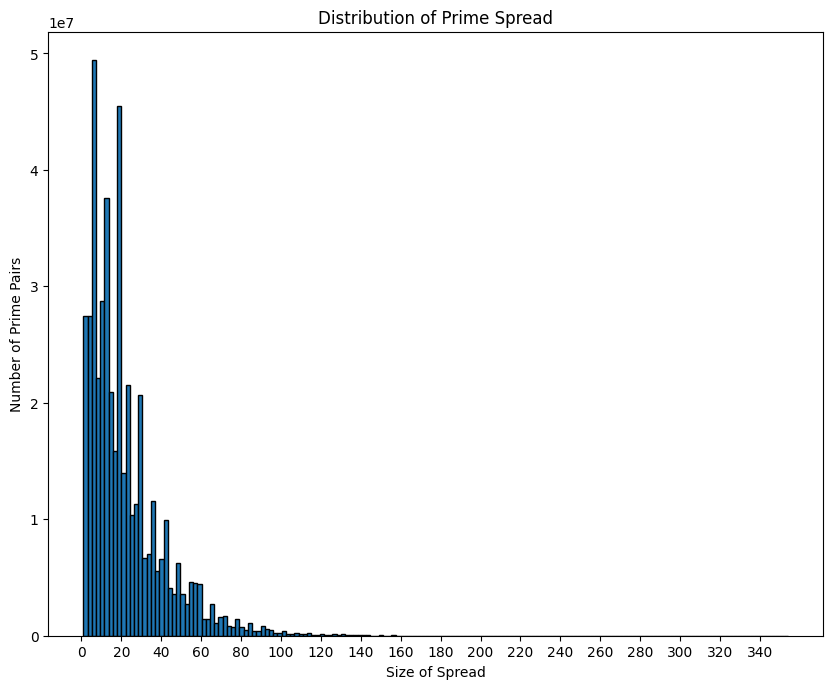

In [15]:
# x-axis is the series containing all differences
x = primes['difference']

# setting figure size
plt.figure(figsize=(10, 8), dpi=100)

# num bins is length of dist dataframe
bin_count = len(dist)

# plotting histogram
plt.hist(x, bins=bin_count, edgecolor='black')
plt.title('Distribution of Prime Spread')
plt.xlabel('Size of Spread')
plt.ylabel('Number of Prime Pairs')

# adding x-axis detail
x_markers = range(0, max_diff, 20)
plt.xticks(x_markers)

None

Lastly, it is useful to know if there is a common factor (aside from 2) that regularly occurs in the set of spread values. We can find this iteratively.

In [14]:
factors = set()

# checking all integers in the range of spread as factors
for f in range(2, max_diff, 2):
    
    # checking all spreads to see if f is a factor
    for d in dist['spread'].tolist():
        
        if d % f == 0:
            factors.add(f)
            
factors = list(factors)
factors.sort()
print(factors)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206, 208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 318, 320, 322, 326, 330, 332, 336, 340]


We now have a list of all factors of all spreads that were identified in the set of primes from 1 to 10,000,000,000 which will be used to check for sequences more easily. 

All of these numbers are of course even, since the sum of two odds is even which makes the value composite by default.